<a href="https://colab.research.google.com/github/fredMelchior/Pandas_Insta_influence2k22/blob/main/insta_influence2k22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 Instagram top Influencers ✨

Dataset by Kaggle.

####*Project Setup*

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
from google.colab import files
arq = files.upload()

In [ ]:
df = pd.read_csv("top_insta_influencers_data.csv")

####Analisando disposição, quantidade e tipos dos dados:

In [ ]:
df.shape

(200, 10)

In [ ]:
df.dtypes

rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [ ]:
df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [ ]:
df.describe()

####*Convertendo os dados type objects em tipos numéricos para possibilitar melhor manuseio dos dados:*

> Nesse caso aqui foi implementado um método que transforma os ***'k'*** em milhares, os '***m***' em milhões e os '***b***' em bilhões, dessa maneira é possível tratar os valores de forma aritmética e extrair o máximo possível do dataset.





In [ ]:
df['posts'].replace({'k': '*1e3', 'm': '*1e6', 'b': '*1e9'}, regex=True, inplace=True)
df['posts'] = df['posts'].map(pd.eval, na_action='ignore')
df['posts'] = df['posts'].astype('Int64', errors='ignore')

In [ ]:
df['followers'].replace({'k': '*1e3', 'm': '*1e6', 'b': '*1e9'}, regex=True, inplace=True)
df['followers'] = df['followers'].map(pd.eval, na_action='ignore')
df['followers'] = df['followers'].astype('Int64', errors='ignore')

In [ ]:
df['avg_likes'].replace({'k': '*1e3', 'm': '*1e6', 'b': '*1e9'}, regex=True, inplace=True)
df['avg_likes'] = df['avg_likes'].map(pd.eval, na_action='ignore')
df['avg_likes'] = df['avg_likes'].astype('Int64', errors='ignore')

In [ ]:
df['new_post_avg_like'].replace({'k': '*1e3', 'm': '*1e6', 'b': '*1e9'}, regex=True, inplace=True)
df['new_post_avg_like'] = df['new_post_avg_like'].map(pd.eval, na_action='ignore')
df['new_post_avg_like'] = df['new_post_avg_like'].astype('Int64', errors='ignore')

In [ ]:
df['total_likes'].replace({'k': '*1e3', 'm': '*1e6', 'b': '*1e9'}, regex=True, inplace=True)
df['total_likes'] = df['total_likes'].map(pd.eval, na_action='ignore')
df['total_likes'] = df['total_likes'].astype('Int64', errors='ignore')


*Conferindo mudança dos types:*

In [ ]:
df.dtypes

rank                   int64
channel_info          object
influence_score        int64
posts                  Int64
followers            float64
avg_likes            float64
60_day_eng_rate       object
new_post_avg_like    float64
total_likes          float64
country               object
dtype: object

*Testando a coluna "total_likes"*

In [ ]:
df['total_likes'].sum()

731622500000.0

#### *Criação de 3 novas colunas possibilitadas pela conversão dos type objects em numéricos:*

In [ ]:
df['likes_per_followers'] = round(df['total_likes'] / df['followers'])

In [ ]:
df['avg_likes_per_posts'] = round(df['avg_likes'] / df['posts'])

In [ ]:
df['total_likes_per_posts'] = round(df['total_likes'] / df['posts'])

### Separando os dados por países:

> Verificando os países existentes na tabela:

In [ ]:
df_countries = df["country"].unique()

In [ ]:
df_countries

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

####*Verificando o número de influenciadores por país:*

<Axes: ylabel='country'>

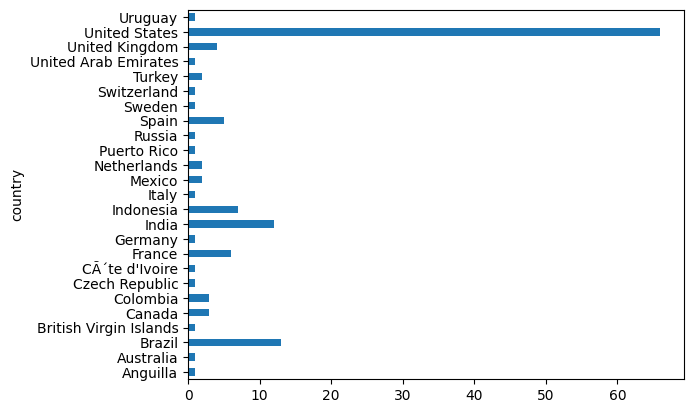

In [ ]:
df.groupby('country')['channel_info'].nunique().plot.barh()

####Criando uma lista com os países com o maior número de influencers

In [ ]:
Bra = df.loc[df['country'] == 'Brazil']

*Determinando os influencers do Brasil e seus seguidores:*

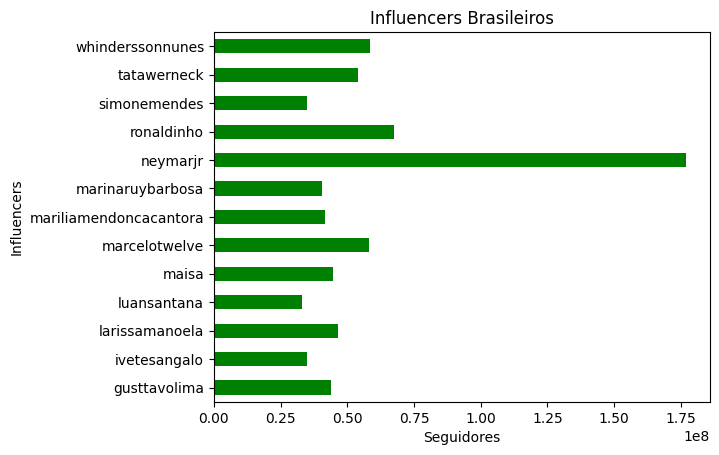

In [ ]:
Bra.groupby('channel_info')['followers'].sum().plot.barh(title="Influencers Brasileiros", color="green");
plt.xlabel("Seguidores");
plt.ylabel("Influencers");

*Filtrando os outros países:*

In [ ]:
Ino = df.loc[df['country'] == 'Indonesia']

In [ ]:
Ini = df.loc[df['country'] == 'India']

In [ ]:
Fra = df.loc[df['country'] == 'France']

In [ ]:
Spa = df.loc[df['country'] == 'Spain']

In [ ]:
Usa = df.loc[df['country'] == 'United States']

*Criando a lista com os 6 países selecionados:*

In [ ]:
country_list = [Bra, Ino, Ini, Fra, Spa, Usa]

####Criando uma função para apresentar os influencers e seu número de seguidores de cada país da lista:

In [ ]:
for c in country_list:
  country_df = c.groupby('channel_info')['followers'].sum()
  print(f"\t{c['country'].unique()}\n")
  print(country_df)
  print("\n")

####*Gerando um gráfico para os influencers americanos:*

In [ ]:
sorted_usa_df = Usa.sort_values(by="followers", ascending=False).head(15)
sorted_usa_df

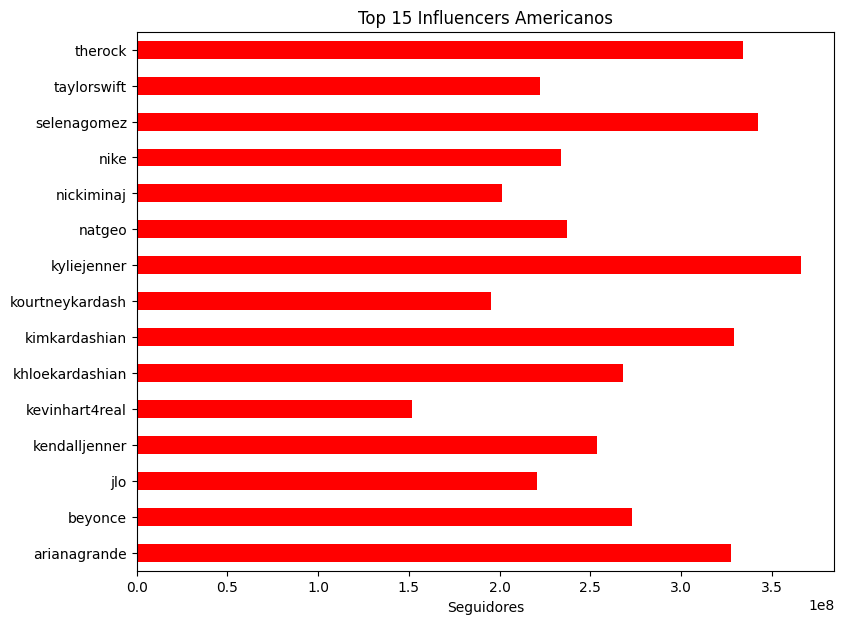

In [ ]:
sorted_usa_df.groupby('channel_info')['followers'].sum().plot.barh(title="Top 15 Influencers Americanos", color="red", figsize=(9, 7));
plt.xlabel("Seguidores");
plt.ylabel("");

####Comparando os influencers Indianos e Brasileiros

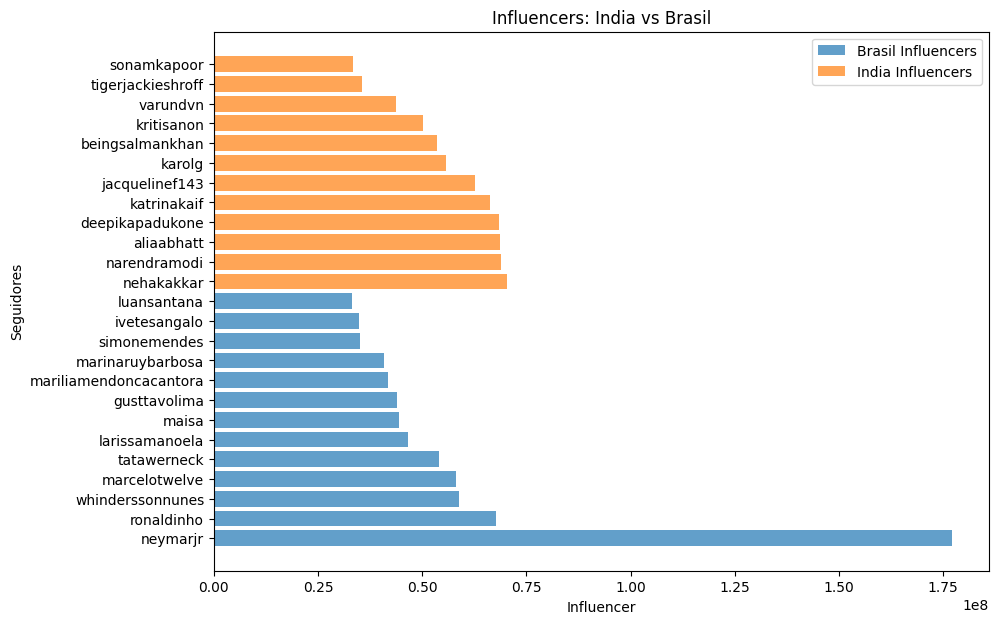

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(Bra['channel_info'], Bra['followers'], label="Brasil Influencers", alpha=0.7)
plt.barh(Ini['channel_info'], Ini['followers'], label="India Influencers", alpha=0.7)
plt.xlabel("Influencer")
plt.ylabel("Seguidores")
plt.title("Influencers: India vs Brasil")
plt.legend()
plt.show()

####Comparando os influencers da França com os da Espanha baseando-se no número de seguidores:

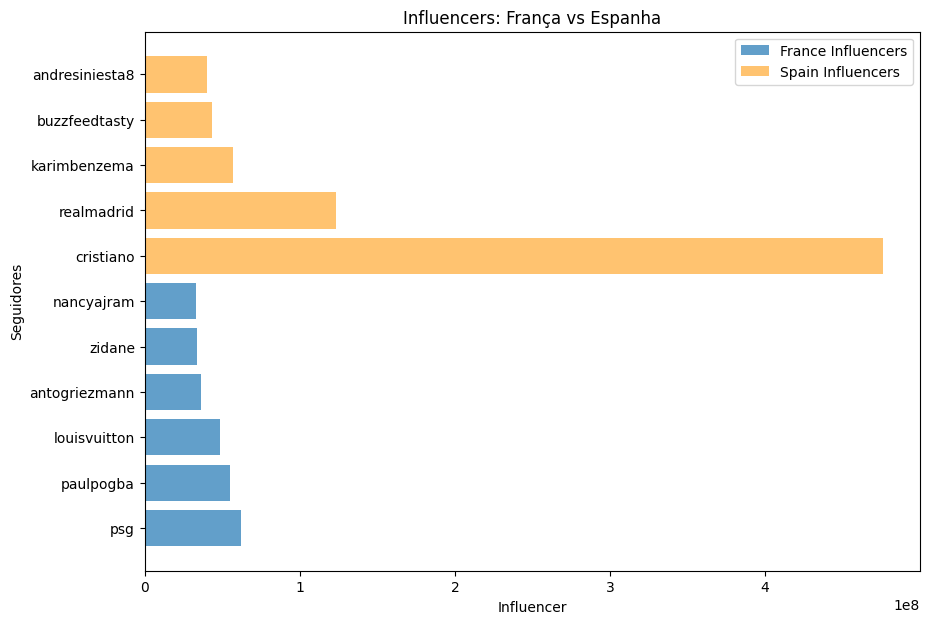

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(Fra['channel_info'], Fra['followers'], label="France Influencers", alpha=0.7)
plt.barh(Spa['channel_info'], Spa['followers'], label="Spain Influencers", alpha=0.7, color="#FFAA33")
plt.xlabel("Influencer")
plt.ylabel("Seguidores")
plt.title("Influencers: França vs Espanha")
plt.legend()
plt.show()

####Criando uma apresentação interativa utilizando ipywidgets

In [ ]:
import ipywidgets as wdg
from ipywidgets import interactive

In [ ]:
def plot_scatter(min_followers):
  """ Função para plotar um gráfico de dispersão """

  filtered_data = Bra[Bra['followers'] >= min_followers]

  plt.figure(figsize=(8, 6))
  plt.scatter(filtered_data['followers'], filtered_data['channel_info'])
  plt.xlabel('Seguidores')
  plt.ylabel('Influencers')
  plt.show()

interactive_plot = interactive(plot_scatter, min_followers=wdg.IntSlider(min=2000000 , max=70000000, step=10, value=0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=2000000, description='min_followers', max=70000000, min=2000000, step=10…